## Downloading the repository

In [1]:
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [2]:
%cd Mask_RCNN

/content/Mask_RCNN


In [3]:
pwd

'/content/Mask_RCNN'

In [4]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [5]:
%cd ..

/content


In [6]:
pwd

'/content'

## Importing the libraries

In [7]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [8]:
%tensorflow_version 1.x
import tensorflow as tf

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.


In [9]:
tf.__version__

'1.15.2'

In [10]:
ROOT_DIR = os.path.abspath('./Mask_RCNN')
ROOT_DIR

'/content/Mask_RCNN'

In [11]:
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [12]:
sys.path.append(ROOT_DIR)

In [13]:
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN']

In [14]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

Using TensorFlow backend.


In [15]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

In [16]:
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN',
 '/',
 '/content/Mask_RCNN/samples/coco/']

In [17]:
import coco

In [18]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

In [19]:
MODEL_DIR, IMAGE_DIR

('/content/Mask_RCNN/logs', '/content/Mask_RCNN/images')

## Loading the pre-trained neural network

In [20]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [21]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [22]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [23]:
config = InferenceConfig()

In [24]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [25]:
MODEL_DIR

'/content/Mask_RCNN/logs'

In [26]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [27]:
!pip install h5py==2.10.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

## Detecting objects 

In [29]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [30]:
len(class_names)

81

In [31]:
class_names[1], class_names.index('person')

('person', 1)

In [32]:
image = skimage.io.imread('/content/Mask_RCNN/images/2516944023_d00345997d_z.jpg') # RGB

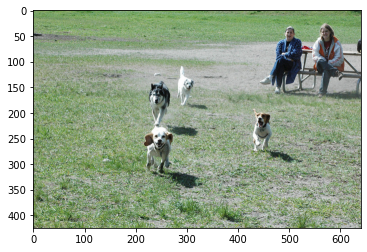

In [33]:
plt.imshow(image);

In [34]:
class_names[17], class_names[1], class_names[14]

('dog', 'person', 'bench')

In [35]:
results = network.detect([image], verbose=0)
results

[{'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
   

In [36]:
r = results[0]

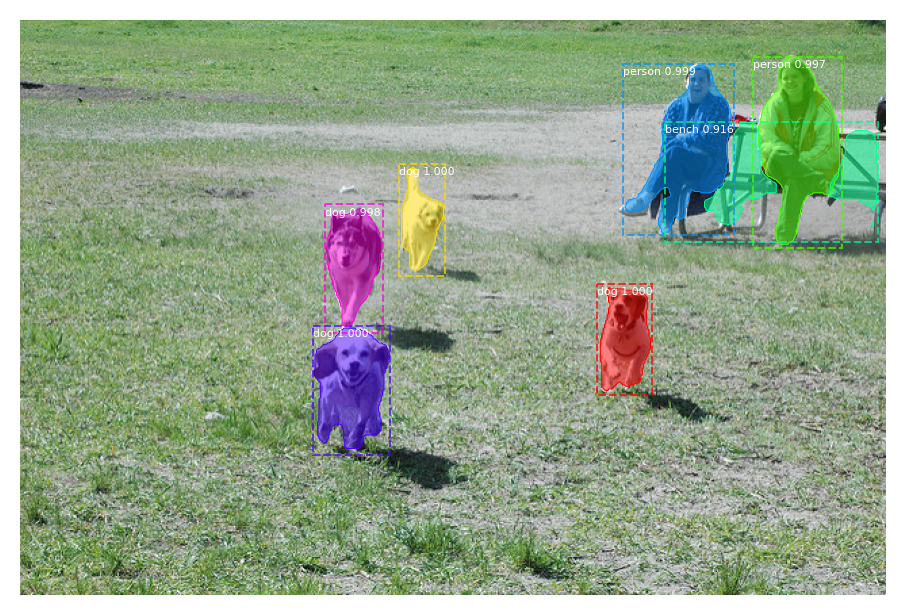

In [37]:
visualize.display_instances(image, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

## Segmentation in videos

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
capture = cv2.VideoCapture('/content/drive/MyDrive/cars.mp4')
connected, frame = capture.read()
connected

True

In [40]:
frame.shape

(720, 1280, 3)

In [41]:
save_video = cv2.VideoWriter('/content/drive/MyDrive/cars_results.avi',
                             cv2.VideoWriter_fourcc(*'XVID'), 24, (frame.shape[1], frame.shape[0]))

In [42]:
!cp /content/drive/MyDrive/PyCharm/video_functions.py ./Mask_RCNN/mrcnn

In [43]:
from mrcnn import video_functions

In [44]:
colors = video_functions.random_colors(len(class_names), 55)
len(colors)

81

In [45]:
print(colors)

[(0.518518518518519, 0.0, 1.0), (1.0, 0.0, 0.14814814814814792), (0.37037037037037046, 1.0, 0.0), (0.0, 1.0, 0.5185185185185182), (1.0, 0.0, 0.5925925925925926), (1.0, 0.0, 0.518518518518519), (1.0, 0.0, 0.7407407407407405), (1.0, 0.5925925925925926, 0.0), (0.0, 1.0, 0.2962962962962963), (0.0, 1.0, 0.7407407407407405), (0.6666666666666667, 1.0, 0.0), (1.0, 0.07407407407407407, 0.0), (0.5925925925925926, 0.0, 1.0), (0.0, 0.5185185185185182, 1.0), (0.0, 1.0, 0.4444444444444442), (0.8888888888888884, 0.0, 1.0), (0.8888888888888888, 1.0, 0.0), (0.0, 0.8888888888888893, 1.0), (1.0, 0.2962962962962963, 0.0), (0.0, 0.2962962962962967, 1.0), (0.0740740740740744, 0.0, 1.0), (0.9629629629629628, 0.0, 1.0), (0.22222222222222232, 0.0, 1.0), (0.7407407407407409, 1.0, 0.0), (1.0, 0.6666666666666666, 0.0), (0.0, 1.0, 0.22222222222222232), (0.0, 1.0, 0.07407407407407396), (0.0, 1.0, 0.5925925925925926), (0.0, 0.44444444444444464, 1.0), (0.0, 0.8148148148148149, 1.0), (1.0, 0.5185185185185185, 0.0), (0

In [46]:
def show(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [47]:
frame_show = 2
current_frame = 0

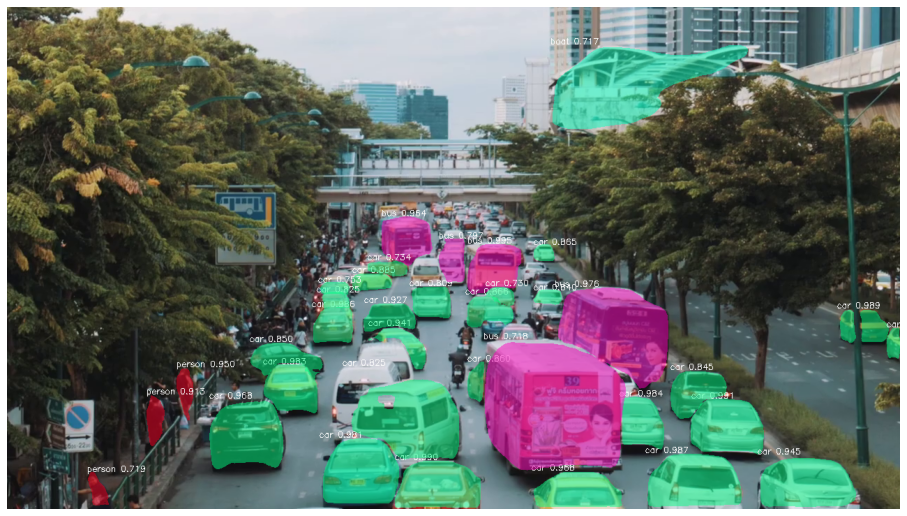

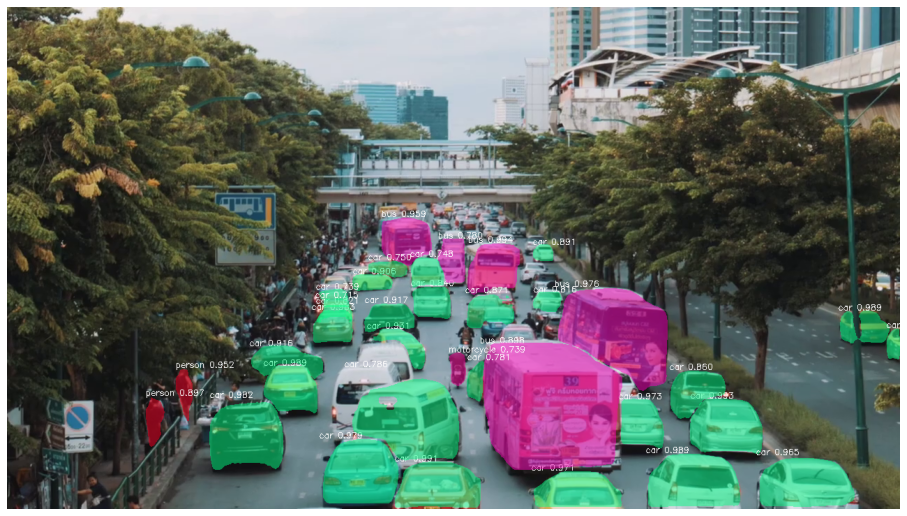

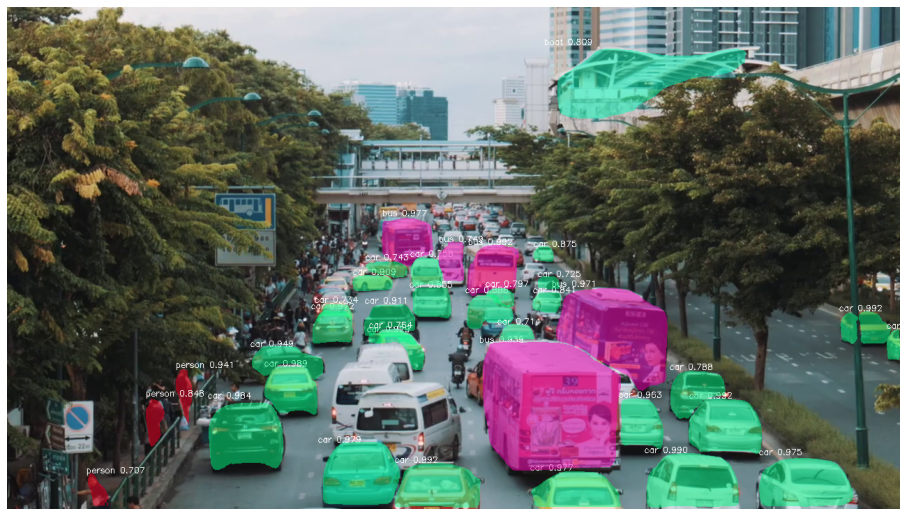

KeyboardInterrupt: ignored

In [48]:
while (cv2.waitKey(1) < 0):
  connected, frame = capture.read()

  if not connected:
    break

  results = network.detect([frame], verbose=0)
  r = results[0]

  processed_frame = video_functions.display_instances(frame, r['rois'], r['masks'],
                                                      r['class_ids'], class_names, r['scores'], colors=colors)
  
  if current_frame <= frame_show:
    show(processed_frame)
    current_frame += 1
  
  save_video.write(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
save_video.release()